In [1]:
# from sklearn.datasets import fetch_openml
# mnist=fetch_openml('mnist_784')

In [2]:
# mnist.data.shape

In [3]:
# Y=mnist.target
# Y.shape

In [4]:
# Y[]

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()

In [6]:
digits.data.shape

(1797, 64)

In [7]:
x,y=digits.data,digits.target

In [8]:
import numpy as np
import pandas as pd

In [9]:
df=pd.DataFrame(x)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [11]:
import matplotlib
import matplotlib.pyplot as plt

In [12]:
some_data=x[110]
some_data_image=some_data.reshape(8,8)

<Figure size 640x480 with 0 Axes>

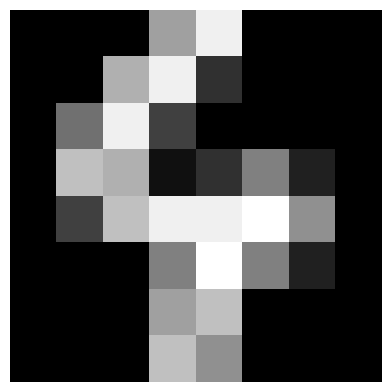

In [13]:
plt.gray()
plt.matshow(some_data_image)
plt.axis('off')
plt.show()

In [14]:
y[110]

4

(-0.5, 7.5, 7.5, -0.5)

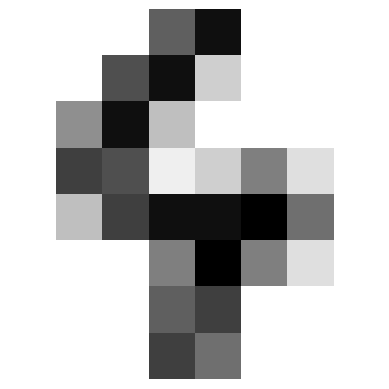

In [15]:
plt.imshow(some_data_image,cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')

In [16]:
y.shape

(1797,)

In [17]:
y[1796]

8

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train, y_train)

SVC()

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9861111111111112


In [22]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")


Precision: 0.9861882716049383
Recall: 0.9861111111111112


In [23]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1}")


F1-Score: 0.9861071324368055


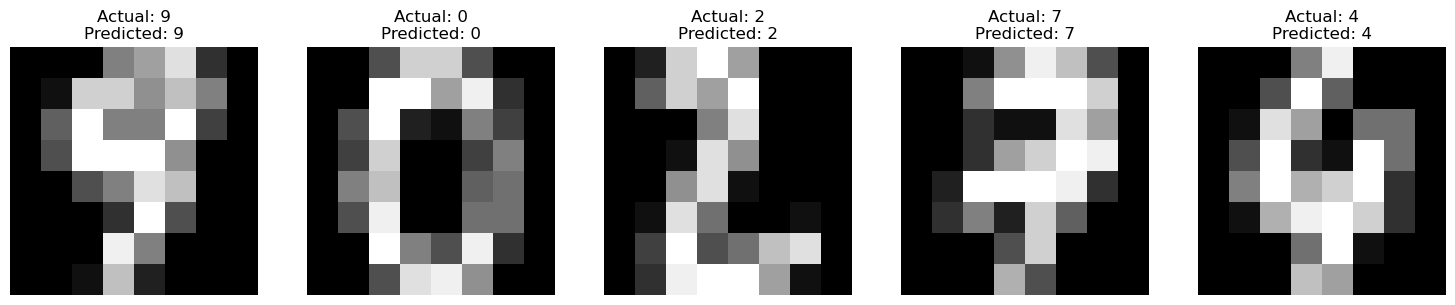

In [24]:
import matplotlib.pyplot as plt
import random

# Randomly select a few samples from the test set
num_samples_to_visualize = 5  # You can change this number
random_indices = random.sample(range(len(X_test)), num_samples_to_visualize)
sample_images = X_test[random_indices]
sample_labels = y_test[random_indices]

# Make predictions on the selected samples
predicted_labels = model.predict(sample_images)

# Create a grid of subplots for visualization
fig, axes = plt.subplots(1, num_samples_to_visualize, figsize=(15, 3))

for i in range(num_samples_to_visualize):
    axes[i].imshow(sample_images[i].reshape(8, 8), cmap='gray')
    axes[i].set_title(f"Actual: {sample_labels[i]}\nPredicted: {predicted_labels[i]}", fontsize=12)
    axes[i].axis('off')

plt.tight_layout()
plt.show()
